# Utility Functions

## Importing libraries

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


## Function to generate dataset

In [255]:
def generate_dataset(mu,sigma, shape):
    
    X = np.random.normal(mu, sigma, shape)
    Y = np.random.uniform(1,3,100)
    return X,Y

## Function to get matrix transpose

In [256]:
def get_matrix_transpose(matrix):
    
    rows = len(matrix)
    columns = len(matrix[0])
    return np.array([[matrix[row][col] for row in range(rows)] for col in range(columns)])

## Function to get matrix determinant

In [257]:
def get_matrix_determinant(matrix):
    return matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]

## Function to get matrix inverse

In [266]:
def get_matrix_inverse(matrix):
    
    #First we calculate determinant of matrix using get_matrix_determinant function. Then we divide it with its adjoint
    determinant = get_matrix_determinant(matrix)
    return [[matrix[1][1]/determinant, -1*matrix[0][1]/determinant],[-1*matrix[1][0]/determinant, matrix[0][0]/determinant]]

## Function to get beta_hat by solving system of normal equations

In [259]:
def learn_linreg_NormEqu(X,Y):
    
    #First get matrix transpose. Then multiply matrix X with its transpose. Then take its inverse. Then multiply inverse with b vector to get beta_hat.
    X_transpose = get_matrix_transpose(X)
    A = np.dot(X_transpose , X)
    b = np.dot(X_transpose , Y)
    inverse_A = get_matrix_inverse(A)
    beta_hat = np.dot(inverse_A,b)
    return beta_hat

## Function to do prediction (y_hat) on feature matrix X

In [260]:
def predict_simple_line_regression(matrix, beta0, beta1):
    
    y_hat = np.multiply(beta0, matrix[:, 0]) + np.multiply(beta1, matrix[:, 1])
    return y_hat

## Function to draw simple 2-D scatter plot

In [261]:
def draw_graph(X, Y, prediction):
    
    plt.title("Simple linear regression")  # Set title for the axes.
    plt.xlabel("X")  # Set the label for the x-axis.
    plt.ylabel("Y")
    plt.plot(X, Y, '.', color="red") #plotting only 2nd coloum of feature matrix X against Y 
    plt.plot(X, prediction, '-', color="green", label="Fitted line") #plotting only 2nd coloum of feature matrix X against predictions
    plt.show()

## Function to draw simple 3-D scatter plot

In [262]:
def draw_3d_graph(X, Y, prediction, beta_hat):
    
    #plane calculation
    k = 10 #size of the plane
    p1, p2 = np.mgrid[:k, :k]
    P = np.hstack((np.reshape(p1, (k*k, 1)), np.reshape(p2, (k*k, 1))))
    plane = np.reshape(prediction, (k, k));

    #plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(X[:,0], X[:,0],Y ,'ro') #scatter plot
    ax.plot_surface(p1,p2,plane) #plane plot
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Y')

    plt.show()

## Function to learn beta_hat and predict y_hat using lstsq buildin function

In [268]:
def learn_predict_linear_regression_using_lstsq(X, Y):
    
    beta_hat = np.linalg.lstsq(X, Y, rcond=None)[0]
    print(f"Using lstsq method = > B0 is {beta_hat[0]}, B1 is { beta_hat[1]}")
#     newPrediction = beta_hat[0] * X[:, 0] + beta_hat[1] * X[:, 1]
#     draw_3d_graph (X,Y,newPrediction,beta_hat)
    

## Main Function


<ol>
  <p>Steps followed in main function to solve the problem:</p>
    <br>
  <li>First set the variable values for generating dataset as specified in the question.</li>
  <li>Then use generate dataset function to generate feature matrix X and actual prediction vector Y. Here I did not added the bias column in the Feature matrix X</li>
  <li>Use learn_linreg_NormEqu function to get values of beta_hat (B0,B1). Here we also make use of inverse function as required in exercise.</li> 
  <li>Get Prediction vector using predict_simple_line_regression function.</li> 
  <li>First plot: plotted Feature matrix X first column on x-axis. The red dots are training points and line is predictioned values.</li>
  <li>Second plot: plotted Feature matrix X second column on x-axis. The red dots are training points and line is predictioned values.</li>
   <li>Third plot: plotted 3D plot with Feature matrix X first column on x-axis, Feature matrix X second column on y-axis, Actual prediction vector Y on z-axis. The red dots are training points and 2-d plane is predictioned values.</li>
 
    
   <li>Finally used the learn_predict_linear_regression_using_lstsq function to get B_0, B_1 values. By using learn_predict_linear_regression_using_lstsq function we get same B_0, B_1 values as we get by using learn_linreg_NormEqu function.</li>
</ol>

In [264]:
def main():
    
    mu = 2  # mean
    sigma = 0.01  # standard deviation
    shape = (100, 2)  # dimensions of matrix
    
    X,Y = generate_dataset(mu, sigma, shape)
    b0, b1 = learn_linreg_NormEqu(X,Y)
    
    print(f"By solving normal equation: B0 is {b0}, B1 is {b1}")
        
    prediction = predict_simple_line_regression(X, b0, b1)
    
    print("\nScatter plot with first column of feature vector X as x-axis")
    draw_graph(X[:,0], Y, prediction)
    
    print("\nScatter plot with Second column of feature vector X as x-axis")
    draw_graph(X[:,1], Y, prediction)
    
    print("\n Scatter plot with x1 and x2 as feature Matrix X respective columns")
    draw_3d_graph (X,Y,prediction,( b0, b1))

    lstsq_predictions = learn_predict_linear_regression_using_lstsq(X,Y)
    

<hr style="border:2px solid gray"> </hr>

## Running main function

By solving normal equation: B0 is 7.339483147668943, B1 is -6.298855581804673

Scatter plot with first column of feature vector X as x-axis


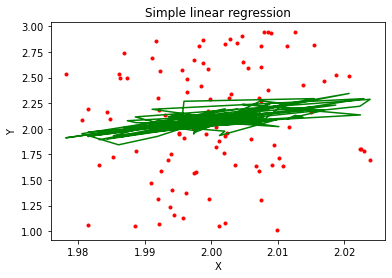


Scatter plot with Second column of feature vector X as x-axis


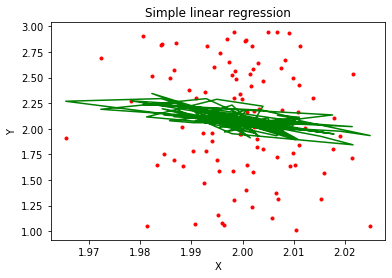


 Scatter plot with x1 and x2 as feature Matrix X respective columns


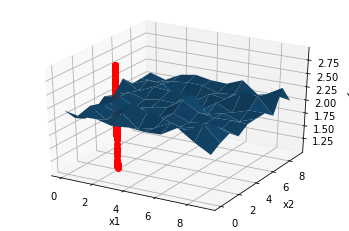

Using lstsq method = > B0 is 7.339483147705257, B1 is -6.298855581837577


In [265]:
if __name__ == "__main__":
    main()